In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.io.fits as afits

In [3]:
import glob

In [4]:
fits = glob.glob('*.fits')

In [5]:
data=[]
for fit in fits:
    print(fit[37])
    data.append(afits.open(fit)[0].data)

g
i
z
y
r


/home/karina/anaconda3/lib/python3.6/site-packages/astropy/visualization/stretch.py:267: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/home/karina/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


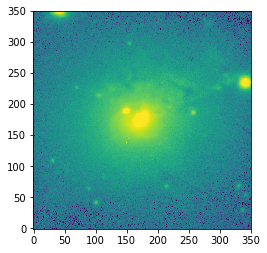

In [9]:
from astropy import visualization as aviz
norm = aviz.ImageNormalize(data[0],interval=aviz.PercentileInterval(99), stretch=aviz.LogStretch())

imshow(data[0],norm=norm, origin='lower')